Girish Sharma

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.linalg import cond, matrix_rank, norm
from scipy.linalg import inv, solve, det, eig, lu, eigvals
from sklearn.metrics import confusion_matrix

MMM, AOS, ABT, ABBV, ACN, ADBE, AMD, AES, AFL, A, APD, ABNB, AKAM, ALB, ARE, ALGN, ALLE, LNT, ALL, GOOGL, GOOG, MO, AMZN, AMCR, AMTM, AEE, AEP, AXP, AIG, AMT, AWK, AMP, AME, AMGN, APH, ADI, ANSS, AON, APA, AAPL, AMAT, APTV, ACGL, ADM, ANET, AJG, AIZ, T, ATO, ADSK, ADP, AZO, AVB, AVY, AXON, BKR, BALL, BAC, BAX, BDX, BRK.B, BBY, TECH, BIIB, BLK, BX, BK, BA, BKNG, BWA, BSX, BMY, AVGO, BR, BRO, BF.B, BLDR, BG, BXP, CHRW, CDNS, CZR, CPT, CPB, COF, CAH, KMX, CCL, CARR, CTLT, CAT, CBOE, CBRE, CDW, CE, COR, CNC, CNP, CF, CRL, SCHW, CHTR, CVX, CMG, CB, CHD, CI, CINF, CTAS, CSCO, C, CFG, CLX, CME, CMS, KO, CTSH, CL, CMCSA, CAG, COP, ED, STZ, CEG, COO, CPRT, GLW, CPAY, CTVA, CSGP, COST, CTRA, CRWD, CCI, CSX, CMI, CVS, DHR, DRI, DVA, DAY, DECK, DE, DELL, DAL, DVN, DXCM, FANG, DLR, DFS, DG, DLTR, D, DPZ, DOV, DOW, DHI, DTE, DUK, DD, EMN, ETN, EBAY, ECL, EIX, EW, EA, ELV, EMR, ENPH, ETR, EOG, EPAM, EQT, EFX, EQIX, EQR, ERIE, ESS, EL, EG, EVRG, ES, EXC, EXPE, EXPD, EXR, XOM, FFIV, FDS, FICO, FAST, FR

[*********************100%***********************]  503 of 503 completed

10 Failed downloads:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['GEV', 'SW', 'VLTO', 'KVUE', 'GEHC', 'CEG', 'AMTM', 'SOLV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2021-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1609477200")')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2021-01-01)')


Explained Variance of each component:
[0.54901318 0.266476   0.05444152 0.03267274 0.01909861 0.01276891
 0.00918581 0.00842963 0.00530378 0.00417361]
Percent return of S&P 500:
0.18585684575627517
Percent return of PCA derived index fund:
0.17702426831957152


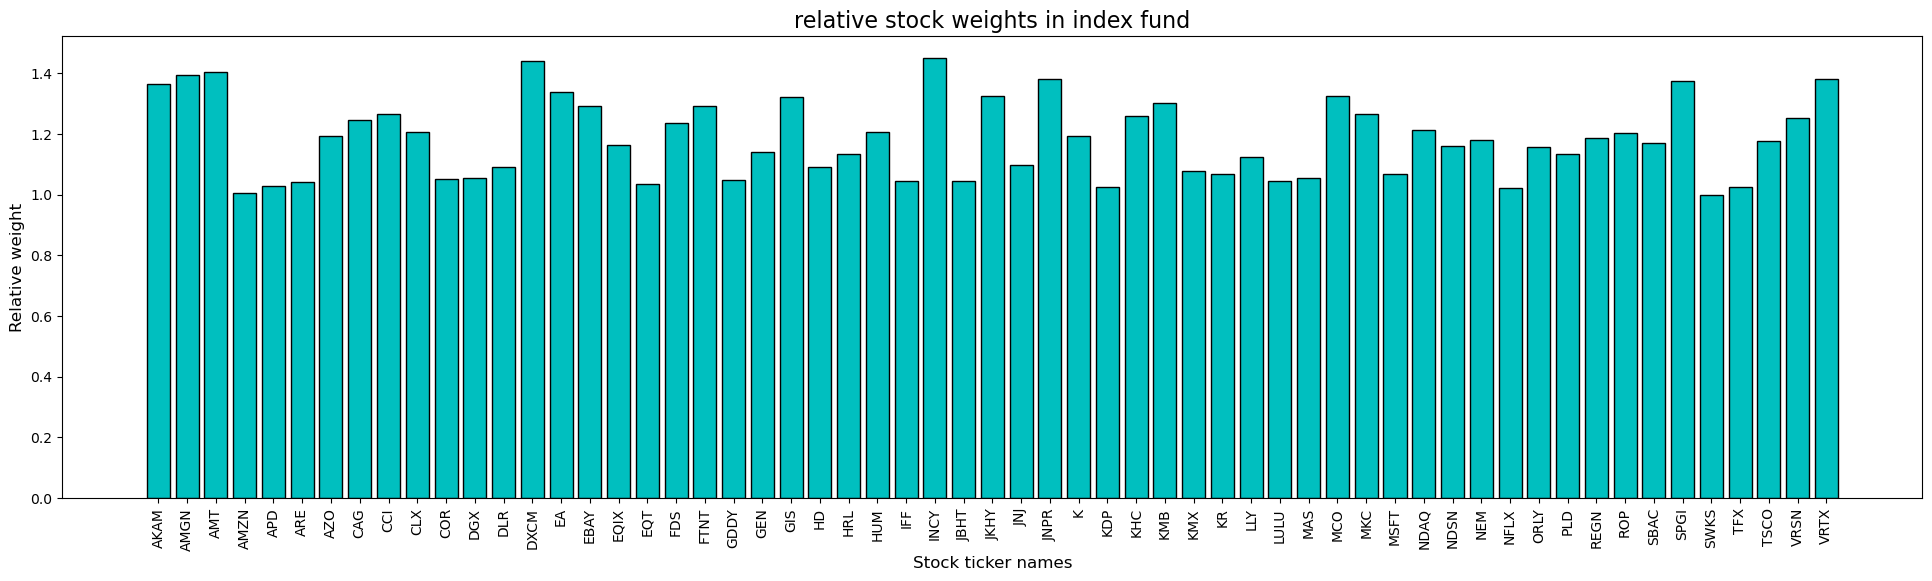

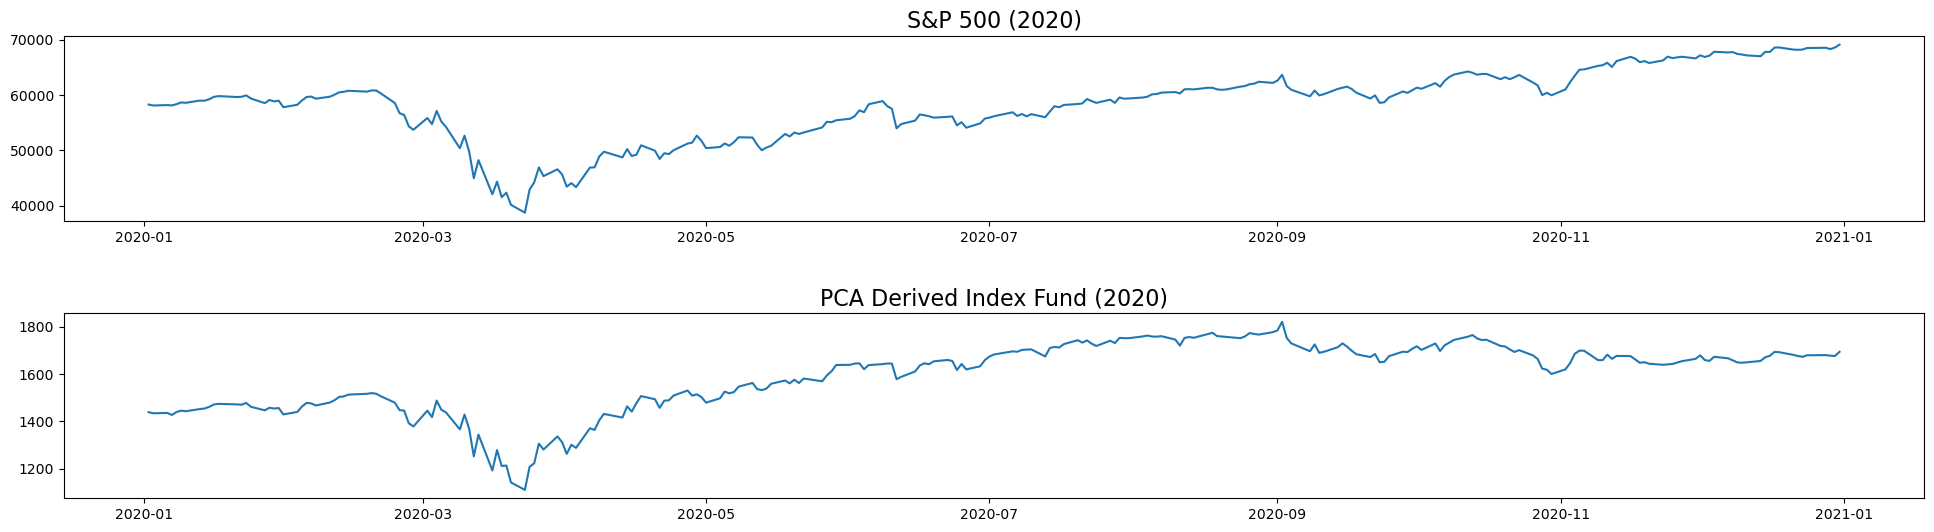

In [27]:
import yfinance as yf
import pandas as pd


def getSP500():
    #getting table of S&P 500 stocks from wikipedia 
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    #get dataframe from the 
    df_sp500 = table[0]

    #getting string of ticker names and removing all single quotes, opening square brackets, closing square brackets, single commas.
    ticker_names = str(df_sp500['Symbol'].to_list()).replace("'","").replace("[","").replace("]","").replace("'","") 
    return ticker_names

ticker_names = getSP500()
print (ticker_names)

#pulling historical data

data = yf.download(ticker_names, start ="2020-01-01", end="2021-01-01")

#getting daily close price and dropping missing columns as BF.B and BRK.B are not there

df_close = data['Adj Close'].dropna(axis='columns')

#defining list of column names
col_names = df_close.columns.to_list()

#showing pandas dataframe of close prices
df_close

#converting dataframe to numpy arrary
x = df_close.to_numpy()
#subtracting mean from each colun and divide by its std using standardscalar from scikit-learnwhich does centring and scaling - substracting mean and dividing by standard deviation, this will help in PCA because it will allow PCA to focus on variation rather than ebing dominated by larger magnitudes

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit_transform(x)

#intiiatlizing PCA with two components

pca = PCA(n_components = 10)

#performing PCA on S&P 500 close price over the year 2024
X_pca = pca.fit_transform(x)

print("Explained Variance of each component:")
print(pca.explained_variance_ratio_)

#building index fund of S&P500 usign principle component weights
# get sum of weights for first 3 principle components

stock_weights_pca = pca.components_[0,:] + pca.components_[1,:] + pca.components_[2,:]
# define number of stocks to include in index fund
top_n = 60

# get boolean array of top n elements 
bool_top_stocks = abs(stock_weights_pca) > np.sort(abs(stock_weights_pca))[len(stock_weights_pca)-top_n]

# create data structures with weights and ticker names that define index fund
index_fund_weights = (stock_weights_pca[bool_top_stocks])
index_fund_tickers = df_close.columns[bool_top_stocks]

#visualiizing index fund holdings

plt.figure(num = None, figsize = (24,6))
plt.bar(np.arange(len(index_fund_weights)), index_fund_weights/np.max((index_fund_weights)), color = 'c', edgecolor ='k')
plt.title("relative stock weights in index fund", fontsize = 16)
plt.xticks(np.arange(len(index_fund_weights)), index_fund_tickers, rotation = 90)
plt.xlabel("Stock ticker names", fontsize = 12)
plt.ylabel("Relative weight", fontsize = 12)
plt.show

# create figure
plt.figure(num=None, figsize=(24, 6))

# plot S&P 500 over time
plt.subplot(2, 1, 1)
plt.plot(np.sum(df_close, axis=1))
plt.title("S&P 500 (2020)", fontsize=16)

# plot index fund over time
plt.subplot(2, 1, 2)
plt.plot(-1*np.sum(index_fund_weights * df_close.iloc[:,bool_top_stocks], axis=1))
plt.title("PCA Derived Index Fund (2020)", fontsize=16)

# add space between plots
plt.subplots_adjust(hspace = 0.5 )

# actual percent return of S&P500 
actual_percent_return = np.sum((df_close.iloc[len(df_close)-1,:] - df_close.iloc[0,:]))/np.sum((df_close.iloc[0,:]))

print('Percent return of S&P 500:')
print(actual_percent_return)

# percent return of S&P500 index fund defined by principal component 1
top_stocks_pc1_percent_return = np.sum(index_fund_weights * (df_close.iloc[len(df_close)-1,bool_top_stocks] - df_close.iloc[0,bool_top_stocks]))/np.sum(index_fund_weights * (df_close.iloc[0,bool_top_stocks]))

print('Percent return of PCA derived index fund:')
print(top_stocks_pc1_percent_return)

The plan was to construct PCA derived index fund for 2020 (Covid-19 year) and compare it with the actual index fund performance. Why PCA is helpful in financial data especially S&P 500 because since it consists of 500 stocks, analyzing and modeling them becomes a complex task. PCA simplifies this by reducing the dataset to a few components that explain most of the variance in stock returns. Initiated PCA with 10 components and printed their explained variance. The first 3 components explained 86% of the variance. I then created an index fund by taking the weights from the first three components, summing them together, and including the top 60 weights, indicating that the first few factors account for most of the movement in the index.

 I used a bar plot to show the weights on the y-axis, which essentially represents the dollar amount allocated to each stock. PCA is also helpful as stock prices often exhibit a latent structure where a few factors drive most of the movements. BY focussing on fewer principle components and subset of stocks , one can create effective fund - which replicates the overall index fund trends. We can see our PCA derived fund in 2020 delivered 17.7% return which is very close to the actual S&P 500 return of 18.5%. 

Data was extracted from yahoo finance, ticker names from wikipedia. Github co-pilot and some medium articles/blogs were used for code inspiration like https://medium.com/wealthy-bytes/5-lines-of-python-to-automate-getting-the-s-p-500-95a632e5e567
https://quant.stackexchange.com/questions/37920/constructing-a-stock-market-index-using-pca
https://ir.canterbury.ac.nz/server/api/core/bitstreams/a7b99f2d-5d9b-4212-a947-31c1d162d1c4/content
https://towardsdatascience.com/principal-component-analysis-pca-79d228eb9d24